In [49]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt 
sys.path.append('../../')
import Constants as c
import Utilities as utils

In [50]:
file_line = "./05_01_2020/performance_measures_Line.csv"
file_Module = "./05_01_2020/performance_measures_Module.csv"

df_Line = pd.read_csv(file_line)
df_Module = pd.read_csv(file_Module)

df_Line.dropna(subset=[c.PRED_25], inplace=True)
df_Line.dropna(subset=[c.PRED_50], inplace=True)
# df_Line = df_Line.sample(n=500)

df_Module.dropna(subset=[c.PRED_25], inplace=True)
df_Module.dropna(subset=[c.PRED_50], inplace=True)
# df_Module = df_Module.sample(n=500)

df = pd.concat([df_Line, df_Module])
# df = pd.concat([df_Line])

In [51]:
def hypothesisTest_Effort(model_records, model, task, pred, mean):
    print("Hypothesis test for {0} and task = '{1}'".format(model, task))

    if task != "ALL":
        filter = model_records[model_records[c.TASK] == task]
        model_records = filter
        # print("TASK - number records: {0}".format(len(model_records)))
    
    if model == c.LINE:
        filter1 = model_records[model_records[c.MODEL] == c.LINE_CC]
        filter2 = model_records[model_records[c.MODEL] == c.LINE_EC]
        model_records = pd.concat([filter1, filter2])
        # print("LINE - number records: {0}".format(len(model_records)))
    elif model == c.MODULE:
        filter1 = model_records[model_records[c.MODEL] == c.MODULE_CC]
        filter2 = model_records[model_records[c.MODEL] == c.MODULE_EC]
        model_records = pd.concat([filter1, filter2])
        # print("MODULE - number records: {0}".format(len(model_records)))

    num_records = len(model_records)
    model_records_mean = round(model_records[pred].mean(),2)

    print("Number of records: {0}".format(num_records))
    print("Sample mean: ", model_records_mean)
    
    alpha = 0.05
    is_gaussian = utils.gaussian_test(model_records[pred], alpha)

    if is_gaussian:
        if num_records <= 60:
            utils.one_sample_t_test(model_records[pred], mean, alpha)
        else:
            utils.one_sample_z_test(model_records[pred], mean, alpha)
    else:
        utils.one_sample_sign_test(model_records[pred], mean, alpha)

    plt.figure(figsize=(8,3))
    plt.tight_layout()
    sb.distplot(model_records[pred], kde=False)


In [52]:
task = "DOCS"

Hypothesis test for Module and task = 'DOCS'
Number of records: 150
Sample mean:  0.31
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  1.7371202345656712e-09
One Sample Sign Test: 0.31 sample median is not likely to be greater than 0.53 (reject H0)


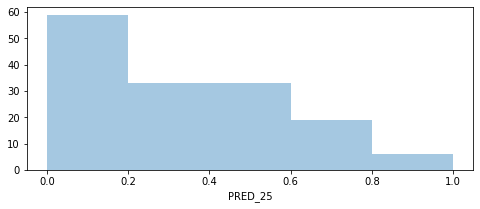

In [55]:
hypothesisTest_Effort(df.copy(), c.MODULE, task, c.PRED_25, 0.53)

Hypothesis test for Module and task = 'DOCS'
Number of records: 150
Sample mean:  0.44
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  2.1755247260990865e-24
One Sample Sign Test: 0.44 sample median is not likely to be greater than 0.87 (reject H0)


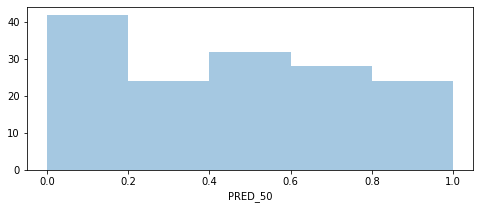

In [56]:
hypothesisTest_Effort(df.copy(), c.MODULE, task, c.PRED_50, 0.87)

Hypothesis test for Line and task = 'DOCS'
Number of records: 112
Sample mean:  0.22
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  3.4525612188472404e-06
One Sample Sign Test: 0.22 sample median is not likely to be greater than 0.33 (reject H0)


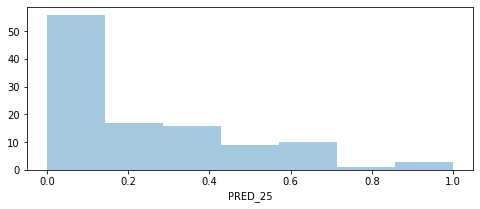

In [53]:
hypothesisTest_Effort(df.copy(), c.LINE, task, c.PRED_25, 0.33)

Hypothesis test for Line and task = 'DOCS'
Number of records: 112
Sample mean:  0.32
Shapiro p-value:  0.0
Shapiro Test: Sample does not look Gaussian (reject H0)
One Sample Sign Test p-value:  1.4198610816550969e-11
One Sample Sign Test: 0.32 sample median is not likely to be greater than 0.6 (reject H0)


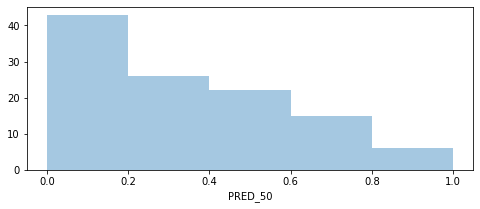

In [54]:
hypothesisTest_Effort(df.copy(), c.LINE, task, c.PRED_50, 0.60)